---
## **SPRINT 1**

**Data Collection and Preprocessing**

---

## Importing Packages

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [41]:
train_data=pd.read_csv('loan_prediction.csv')
data = train_data.copy()
data=data.rename(columns={'Self_Employed':'Employment','Married':'Marital_Status'})
data.head()

Loan_ID Gender Marital_Status Dependents     Education Employment  \
0  LP001002   Male             No          0      Graduate         No   
1  LP001003   Male            Yes          1      Graduate         No   
2  LP001005   Male            Yes          0      Graduate        Yes   
3  LP001006   Male            Yes          0  Not Graduate         No   
4  LP001008   Male             No          0      Graduate         No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [42]:
data.drop(columns=['Loan_ID'],inplace=True)
data.head()

Gender Marital_Status Dependents     Education Employment  ApplicantIncome  \
0   Male             No          0      Graduate         No             5849   
1   Male            Yes          1      Graduate         No             4583   
2   Male            Yes          0      Graduate        Yes             3000   
3   Male            Yes          0  Not Graduate         No             2583   
4   Male             No          0      Graduate         No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [43]:
data.shape

(614, 12)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Marital_Status     611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Employment         582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [45]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [46]:
data.Marital_Status.value_counts()

Yes    398
No     213
Name: Marital_Status, dtype: int64

In [47]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [48]:
data.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [49]:
data.Employment.value_counts()

No     500
Yes     82
Name: Employment, dtype: int64

In [50]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [51]:
data.Property_Area.value_counts().sort_values

<bound method Series.sort_values of Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64>

In [52]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data Vizualization

Univariate Analysis

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

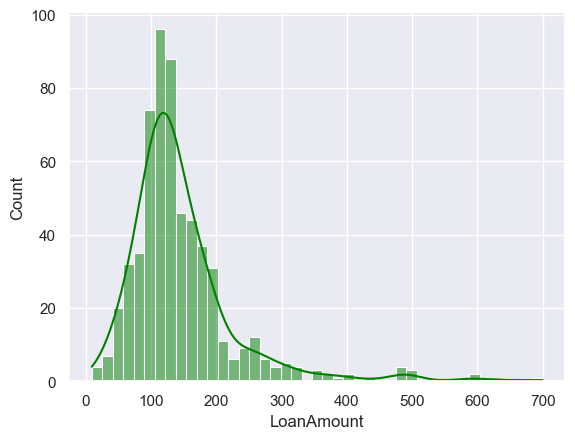

In [53]:
sns.histplot(data.LoanAmount,color='green',kde=True)

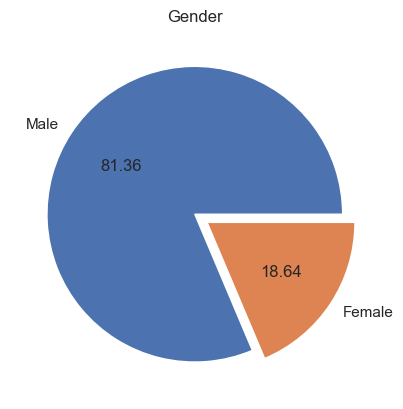

In [54]:
plt.pie(data.Gender.value_counts(),[0,0.1],labels=['Male','Female'],autopct="%.2f")
plt.title('Gender')
plt.show()

<BarContainer object of 4 artists>

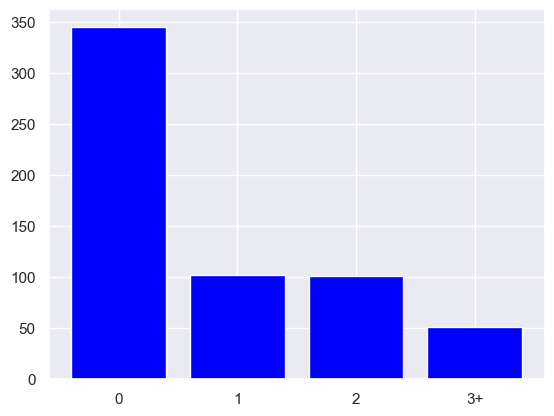

In [55]:
plt.bar(data.Dependents.value_counts().index,data.Dependents.value_counts(),color='blue')

Bi-variate Analysis

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

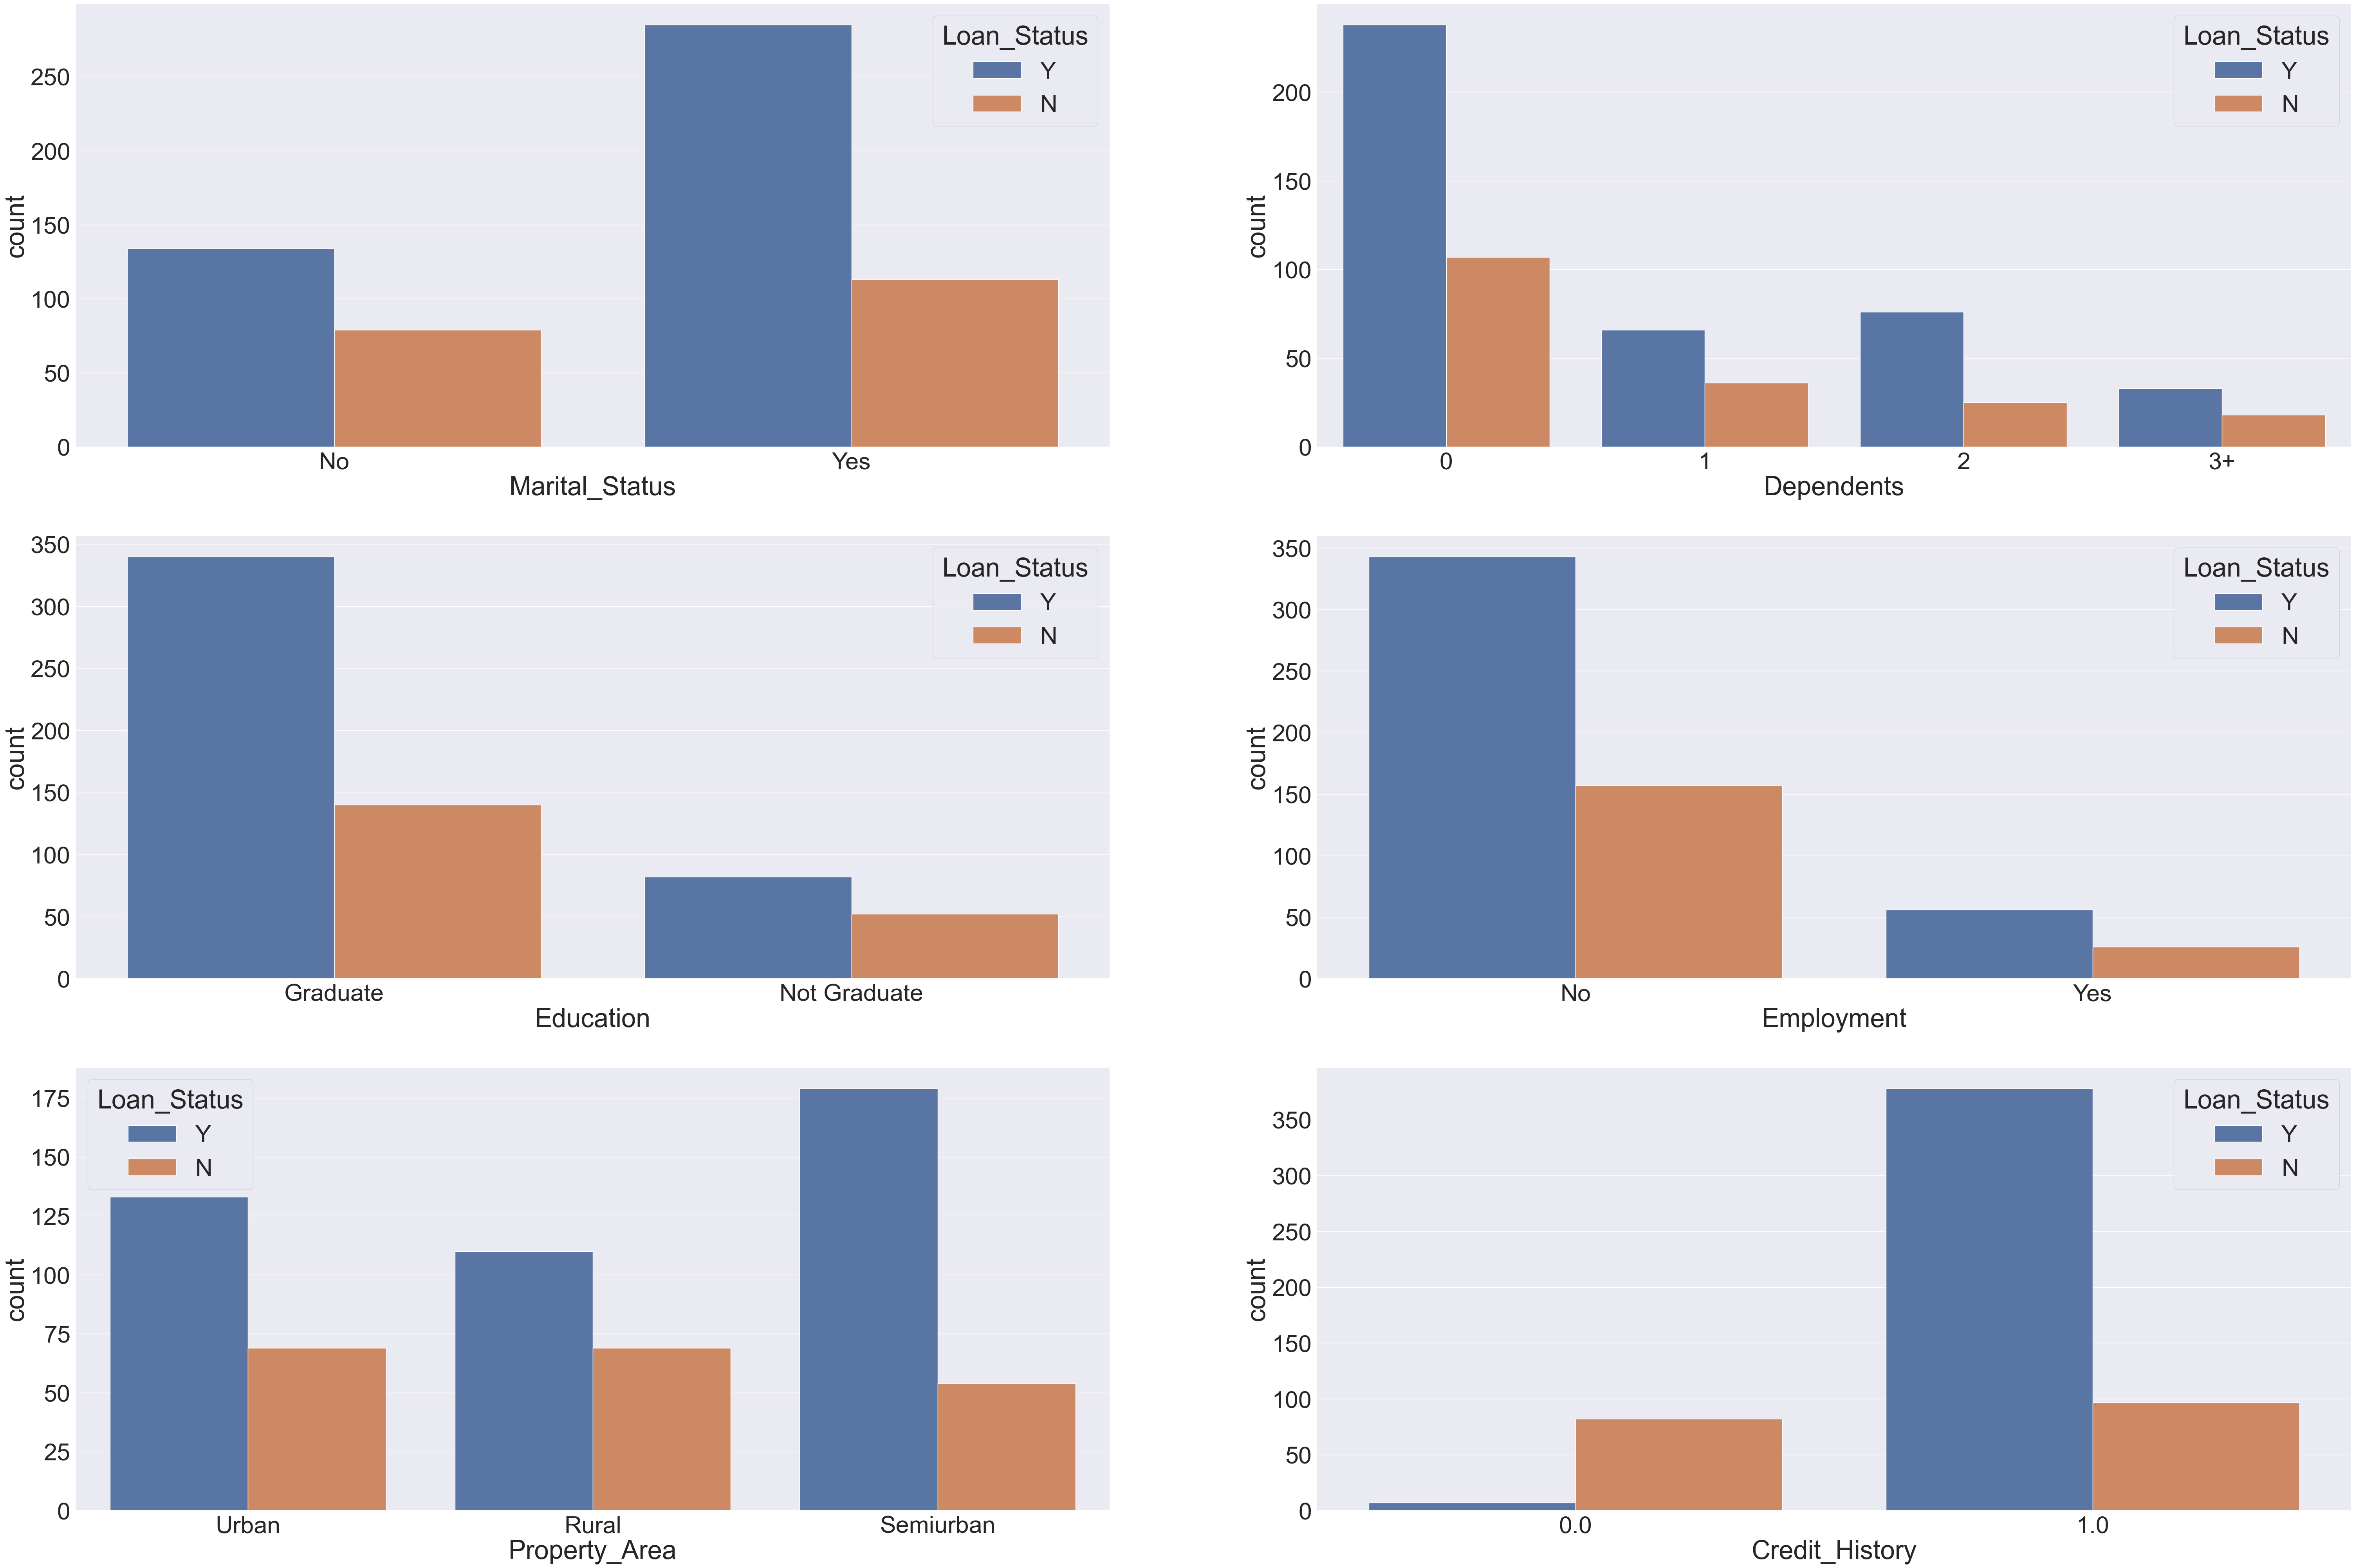

In [56]:
%matplotlib inline
plt.figure(figsize=(75,50))
sns.set_theme(font_scale=4)
plt.subplot(3,2,1)
sns.countplot(x=data.Marital_Status,hue=data.Loan_Status)
plt.subplot(3,2,2)
sns.countplot(x=data.Dependents,hue=data.Loan_Status)
plt.subplot(3,2,3)
sns.countplot(x=data.Education,hue=data.Loan_Status)
plt.subplot(3,2,4)
sns.countplot(x=data.Employment,hue=data.Loan_Status)
plt.subplot(3,2,5)
sns.countplot(x=data.Property_Area,hue=data.Loan_Status)
plt.subplot(3,2,6)
sns.countplot(x=data.Credit_History,hue=data.Loan_Status)

Multi-variate Analysis

<AxesSubplot:>

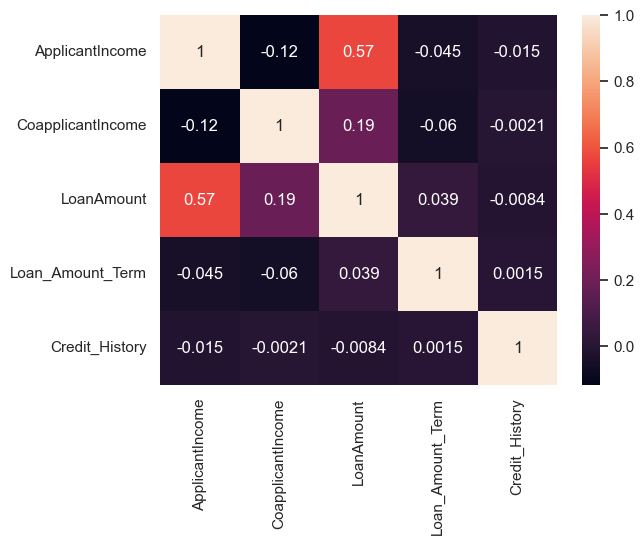

In [57]:
sns.set_theme(font_scale=1)
sns.heatmap(data=data.corr(),annot=True)

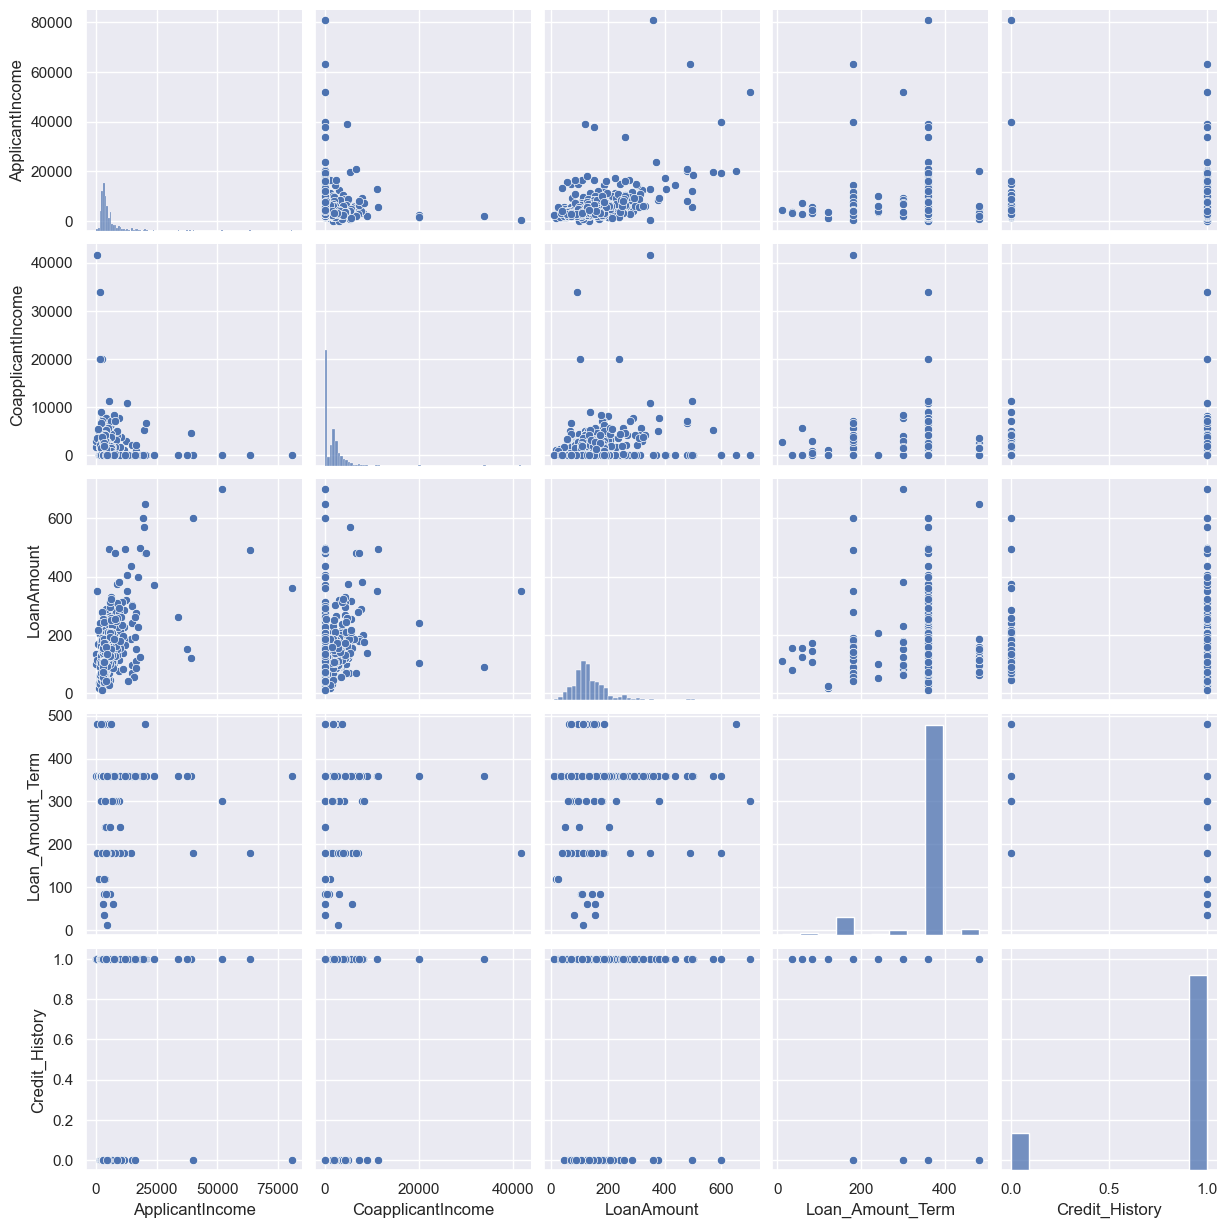

In [58]:
sns.pairplot(data)

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

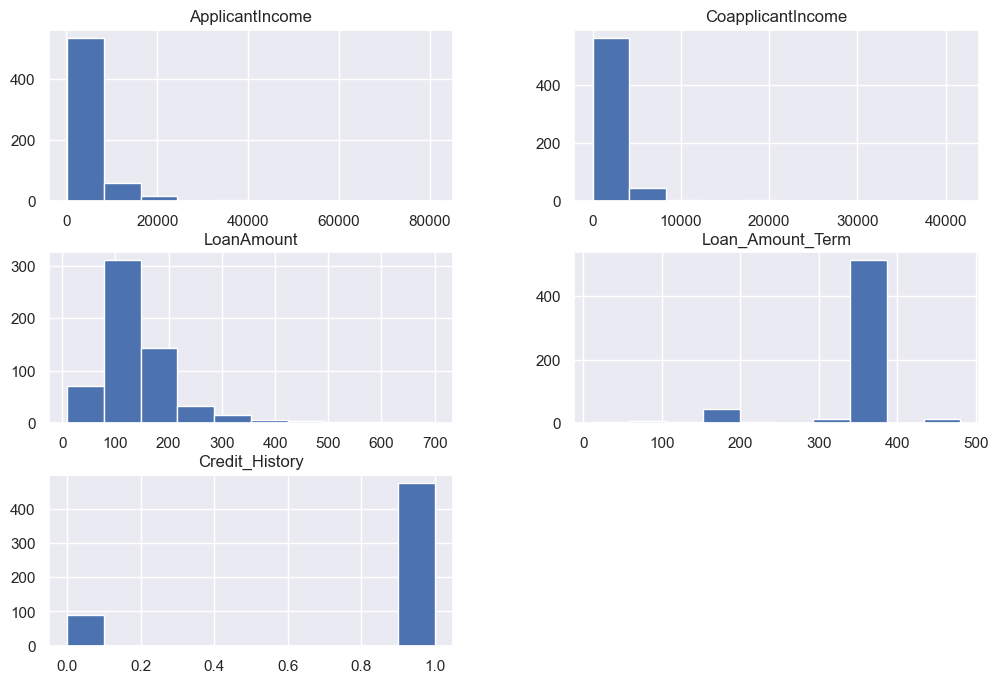

In [59]:
data.hist(figsize=(12,8))

## Exploratory Data Analysis

In [60]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

## Handling Null Values

In [61]:
data.isna().sum()

Gender               13
Marital_Status        3
Dependents           15
Education             0
Employment           32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
data.Gender.fillna(data.Gender.mode()[0],inplace=True)
data.Gender.isna().sum()

0

In [63]:
data.Marital_Status.fillna(data.Marital_Status.mode()[0],inplace=True)
data.Marital_Status.isna().sum()

0

In [64]:
data.Dependents.fillna(data.Dependents.mode()[0],inplace=True)
data.Dependents.isna().sum()

0

In [65]:
data.Employment.fillna(data.Employment.mode()[0],inplace=True)
data.Employment.isna().sum()

0

In [66]:
data.LoanAmount.fillna(value=data.LoanAmount.median(),inplace=True)
data.LoanAmount.isna().sum()

0

In [67]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median(),inplace=True)
data.Loan_Amount_Term.isna().sum()

0

In [68]:
data.Credit_History.fillna(data.Credit_History.mode()[0],inplace=True)
data.Credit_History.isna().sum()

0

In [69]:
data.isna().sum()

Gender               0
Marital_Status       0
Dependents           0
Education            0
Employment           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Finding outliers and replace them

<AxesSubplot:xlabel='Loan_Amount_Term'>

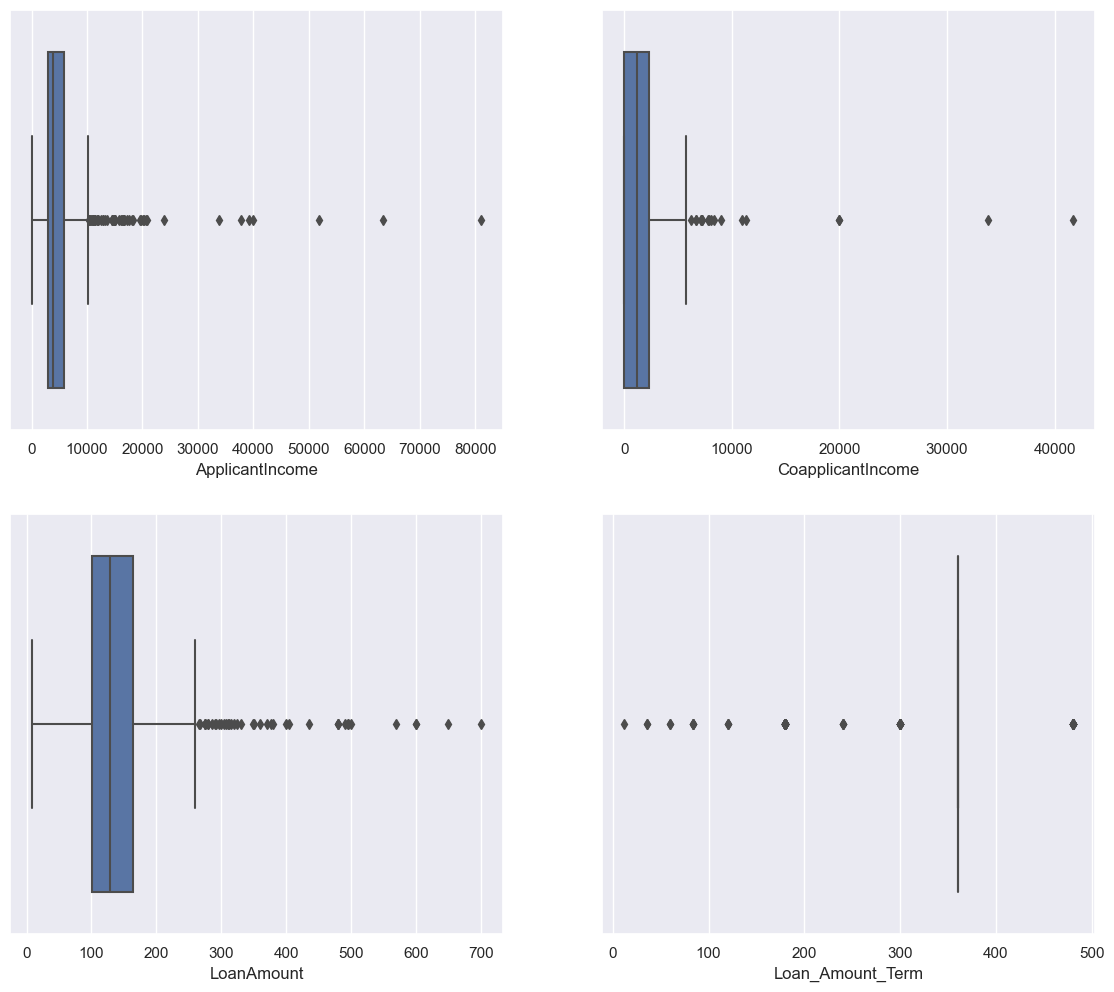

In [70]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='ApplicantIncome')
plt.subplot(2,2,2)
sns.boxplot(data=data,x='CoapplicantIncome')
plt.subplot(2,2,3)
sns.boxplot(data=data,x='LoanAmount')
plt.subplot(2,2,4)
sns.boxplot(data=data,x='Loan_Amount_Term')

<AxesSubplot:xlabel='ApplicantIncome'>

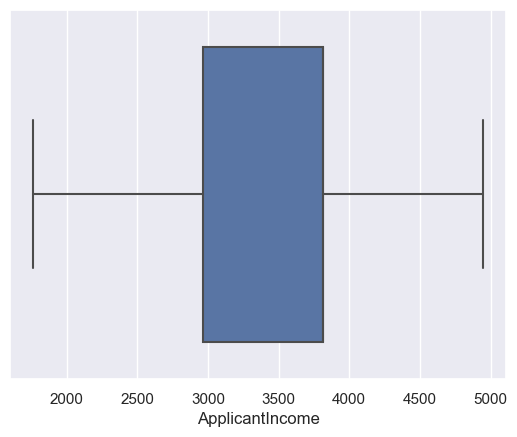

In [71]:
q1=data.ApplicantIncome.quantile(0.27)
q3=data.ApplicantIncome.quantile(0.49)
IQR=q3-q1
upper_lim=q3 + 1.5 * IQR
lower_lim=q1 -1.5 * IQR
data.ApplicantIncome=np.where(data.ApplicantIncome > upper_lim,data.ApplicantIncome.median(),data.ApplicantIncome)
data.ApplicantIncome=np.where(data.ApplicantIncome < lower_lim,data.ApplicantIncome.median(),data.ApplicantIncome)
sns.boxplot(data=data,x='ApplicantIncome')

<AxesSubplot:xlabel='CoapplicantIncome'>

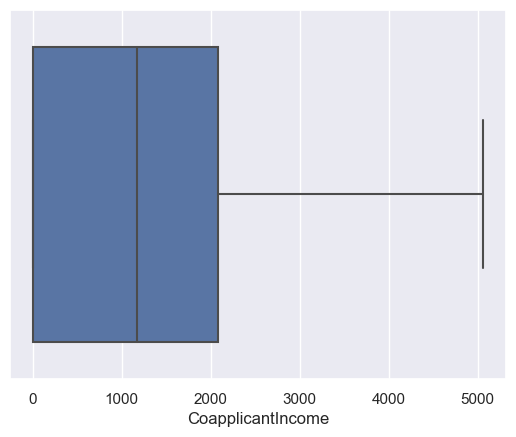

In [72]:
q1=data.CoapplicantIncome.quantile(0.25)
q3=data.CoapplicantIncome.quantile(0.71)
IQR=q3-q1
upper_lim=q3 + 1.5 * IQR
data.CoapplicantIncome=np.where(data.CoapplicantIncome > upper_lim,data.CoapplicantIncome.median(),data.CoapplicantIncome)
sns.boxplot(data=data,x='CoapplicantIncome')

<AxesSubplot:xlabel='LoanAmount'>

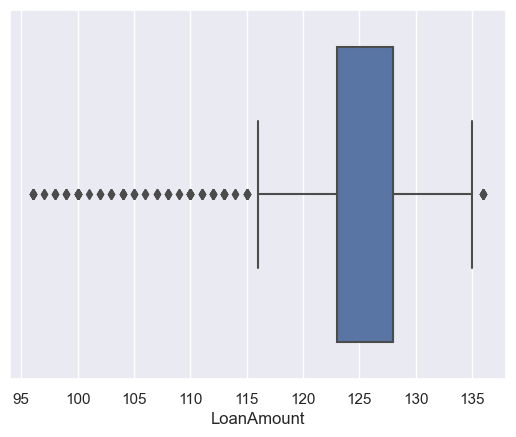

In [73]:
q1=data.LoanAmount.quantile(0.20)
q3=data.LoanAmount.quantile(0.60)
data.LoanAmount=np.where(data.LoanAmount > q3,data.LoanAmount.median(),data.LoanAmount)
data.LoanAmount=np.where(data.LoanAmount < q1,data.LoanAmount.median(),data.LoanAmount)
sns.boxplot(data=data,x='LoanAmount')

Furthur replacement of outliers with median will replace all of the value in the column with median

## Encoding categorical columns

In [74]:
data.head()

Gender Marital_Status Dependents     Education Employment  ApplicantIncome  \
0   Male             No          0      Graduate         No           3812.5   
1   Male            Yes          1      Graduate         No           4583.0   
2   Male            Yes          0      Graduate        Yes           3000.0   
3   Male            Yes          0  Not Graduate         No           2583.0   
4   Male             No          0      Graduate         No           3812.5   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0       128.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       128.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.Marital_Status=le.fit_transform(data.Marital_Status)
data.Dependents=le.fit_transform(data.Dependents)
data.Education=le.fit_transform(data.Education)
data.Employment=le.fit_transform(data.Employment)
data.Property_Area=le.fit_transform(data.Property_Area)
data.Loan_Status=le.fit_transform(data.Loan_Status)

In [76]:
data.head()

Gender  Marital_Status  Dependents  Education  Employment  ApplicantIncome  \
0       1               0           0          0           0           3812.5   
1       1               1           1          0           0           4583.0   
2       1               1           0          0           1           3000.0   
3       1               1           0          1           0           2583.0   
4       1               0           0          0           0           3812.5   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0       128.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       128.0             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1

<AxesSubplot:>

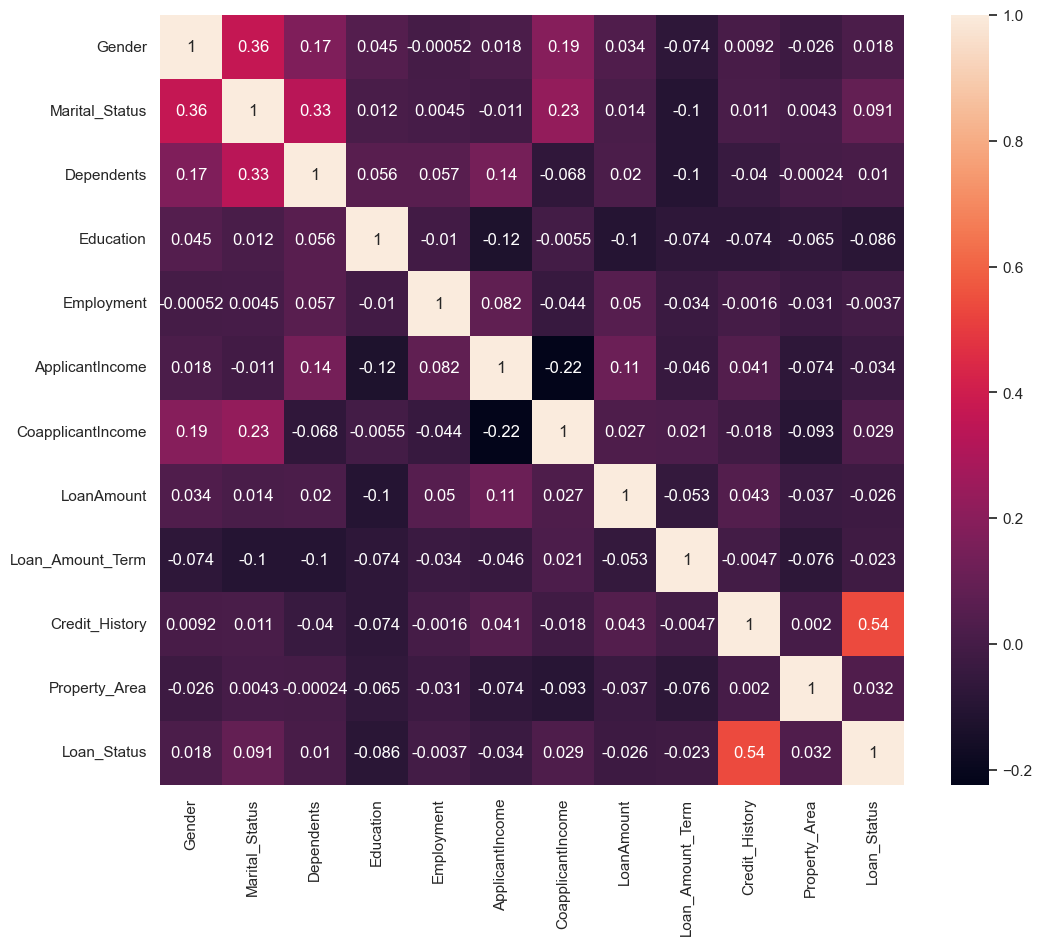

In [77]:
plt.figure(figsize=(12,10))
sns.set_theme(font_scale=1)
sns.heatmap(data.corr(),annot=True)

In [78]:
data.Loan_Status=data.Loan_Status.map({1:'Y',0:'N'})
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Split the data into independent and dependent variables

In [79]:
x=data.drop(columns=['Loan_Status'])
x

Gender  Marital_Status  Dependents  Education  Employment  \
0         1               0           0          0           0   
1         1               1           1          0           0   
2         1               1           0          0           1   
3         1               1           0          1           0   
4         1               0           0          0           0   
..      ...             ...         ...        ...         ...   
609       0               0           0          0           0   
610       1               1           3          0           0   
611       1               1           1          0           0   
612       1               1           2          0           0   
613       0               0           0          0           1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             3812.5                0.0       128.0             360.0   
1             4583.0             1508.0       128.0             360.0   
2             3000.0                0.0       128.0             360.0   
3             2583.0             2358.0       120.0             360.0   
4             3812.5                0.0       128.0             360.0   
..               ...                ...         ...               ...   
609           2900.0                0.0       128.0             360.0   
610           4106.0                0.0       128.0             180.0   
611           3812.5              240.0       128.0             360.0   
612           3812.5                0.0       128.0             360.0   
613           4583.0                0.0       133.0             360.0   

     Credit_History  Property_Area  
0               1.0              2  
1               1.0              0  
2               1.0              2  
3               1.0              2  
4               1.0              2  
..              ...            ...  
609             1.0              0  
610             1.0              0  
611             1.0              2  
612             1.0              2  
613             0.0              1  

[614 rows x 11 columns]

In [80]:
y=data.Loan_Status
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

## Scaling of independent variables

In [81]:
from sklearn.preprocessing import scale
x_scaled=pd.DataFrame(scale(x),columns=x.columns)
x_scaled.head()

Gender  Marital_Status  Dependents  Education  Employment  \
0  0.472343       -1.372089   -0.737806  -0.528362   -0.392601   
1  0.472343        0.728816    0.253470  -0.528362   -0.392601   
2  0.472343        0.728816   -0.737806  -0.528362    2.547117   
3  0.472343        0.728816   -0.737806   1.892641   -0.392601   
4  0.472343       -1.372089   -0.737806  -0.528362   -0.392601   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.491775          -0.912834    0.476889          0.273231   
1         1.559202           0.219569    0.476889          0.273231   
2        -0.633838          -0.912834    0.476889          0.273231   
3        -1.211537           0.857860   -0.396193          0.273231   
4         0.491775          -0.912834    0.476889          0.273231   

   Credit_History  Property_Area  
0        0.411733       1.223298  
1        0.411733      -1.318513  
2        0.411733       1.223298  
3        0.411733       1.223298  
4        0.411733       1.223298

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=3)

In [83]:
train_test_shape={'x_train':x_train.shape,'x_test':x_test.shape,'y_train':y_train.shape,'y_test':y_test.shape}
pd.Series(train_test_shape)

x_train    (429, 11)
x_test     (185, 11)
y_train       (429,)
y_test        (185,)
dtype: object